# Compare methods on CASP dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style='darkgrid')
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
def eval(df: pd.DataFrame, base_method: str, comparison_method_list: list, label: str = 'GDT_TS', target_column_name: str = 'target', discard_low_model: bool = True, discard_thre=40):
    if discard_low_model:
        df = df.groupby(target_column_name).filter(lambda x: x[label].max() > discard_thre)
    group = df.groupby(target_column_name)
    pearson = group.corr()[label]
    spearman = group.corr('spearman')[label]
    pro_pearson = pearson.mean(level=1)[base_method]
    pro_spearman = spearman.mean(level=1)[base_method]
    loss = group.apply(lambda x: x[label].max()-x[label][x[base_method].idxmax()])
    pro_loss = loss.mean()
    zscore = group.apply(lambda x: stats.zscore(x[label])[x.index.get_loc(x[base_method].idxmax())])
    pro_zscore = zscore.mean()
    pearson_list = [pro_pearson]
    spearman_list = [pro_spearman]
    loss_list = [pro_loss]
    zscore_list = [pro_zscore]
    p_pearson_list = [None]
    p_spearman_list = [None]
    p_loss_list = [None]
    p_zscore_list = [None]
    for method in comparison_method_list:
        pearson_list.append(pearson.mean(level=1)[method])
        _, p_pearson = stats.wilcoxon(list(pearson[:, base_method]), list(pearson[:,method]))
        p_pearson_list.append(p_pearson)
        spearman_list.append(spearman.mean(level=1)[method])
        _, p_spearman = stats.wilcoxon(list(spearman[:, base_method]), list(spearman[:,method]))
        p_spearman_list.append(p_spearman)
        com_loss = group.apply(lambda x: x[label].max() - x[label][x[method].idxmax()])
        loss_list.append(com_loss.mean())
        _, p_loss = stats.wilcoxon(list(loss), list(com_loss))
        p_loss_list.append(p_loss)
        com_zscore = group.apply(lambda x: stats.zscore(x[label])[x.index.get_loc(x[method].idxmax())])
        zscore_list.append(com_zscore.mean())
        _, p_zscore = stats.wilcoxon(list(zscore), list(com_zscore))
        p_zscore_list.append(p_zscore)
        method = [base_method] + list(comparison_method_list)
    
    result_df = pd.DataFrame({'pearson': pearson_list, 'spearman': spearman_list, 'loss': loss_list, 'zscore': zscore_list, 'pearson_p': p_pearson_list, 'spearman_p': p_spearman_list, 'loss_p': p_loss_list, 'zscore_p': p_zscore_list}, index=method)
    return result_df

In [3]:
casp13_df = pd.read_csv('casp13.csv', index_col=0)
casp12_df = pd.read_csv('casp12.csv', index_col=0)
casp11_df = pd.read_csv('casp11.csv', index_col=0)
comparison_methods = ['Sato-3DCNN', 'ProQ3D', 'SBROD', 'VoroMQA']

In [4]:
# casp13_result_df = eval(casp13_df)
casp13_result_df = eval(casp13_df, base_method='Proposed', comparison_method_list=comparison_methods)
casp13_result_df['dataset'] = 'CASP13'
casp13_result_df

pearson  spearman   loss  zscore  pearson_p  spearman_p  loss_p  \
Proposed      0.797     0.757  5.708   1.264        NaN         NaN     NaN   
Sato-3DCNN    0.748     0.703  6.527   1.167      0.000       0.000   0.444   
ProQ3D        0.686     0.638  9.482   0.990      0.000       0.000   0.022   
SBROD         0.674     0.637 10.014   0.930      0.000       0.000   0.000   
VoroMQA       0.676     0.624 12.105   0.786      0.000       0.000   0.002   

            zscore_p dataset  
Proposed         NaN  CASP13  
Sato-3DCNN     0.393  CASP13  
ProQ3D         0.023  CASP13  
SBROD          0.001  CASP13  
VoroMQA        0.001  CASP13

In [5]:
casp12_result_df = eval(casp12_df, base_method='Proposed', comparison_method_list=comparison_methods)
casp12_result_df['dataset'] = 'CASP12'
casp12_result_df

pearson  spearman  loss  zscore  pearson_p  spearman_p  loss_p  \
Proposed      0.856     0.782 4.319   1.240        NaN         NaN     NaN   
Sato-3DCNN    0.746     0.675 5.530   1.139      0.000       0.000   0.489   
ProQ3D        0.750     0.672 7.989   0.922      0.000       0.000   0.005   
SBROD         0.682     0.612 7.063   0.967      0.000       0.000   0.035   
VoroMQA       0.671     0.592 7.649   0.963      0.000       0.000   0.043   

            zscore_p dataset  
Proposed         NaN  CASP12  
Sato-3DCNN     0.499  CASP12  
ProQ3D         0.007  CASP12  
SBROD          0.042  CASP12  
VoroMQA        0.043  CASP12

In [6]:
casp11_result_df = eval(casp11_df, base_method='Proposed', comparison_method_list=comparison_methods)
casp11_result_df['dataset'] = 'CASP11'
casp11_result_df

pearson  spearman  loss  zscore  pearson_p  spearman_p  loss_p  \
Proposed      0.724     0.688 3.116   1.289        NaN         NaN     NaN   
Sato-3DCNN    0.600     0.583 3.662   1.231      0.000       0.000   0.196   
ProQ3D        0.526     0.496 6.133   0.820      0.000       0.000   0.003   
SBROD         0.449     0.434 6.030   0.873      0.000       0.000   0.009   
VoroMQA       0.469     0.466 6.820   0.806      0.000       0.000   0.002   

            zscore_p dataset  
Proposed         NaN  CASP11  
Sato-3DCNN     0.269  CASP11  
ProQ3D         0.008  CASP11  
SBROD          0.007  CASP11  
VoroMQA        0.003  CASP11

In [7]:
casp_result_df = pd.concat([casp13_result_df, casp12_result_df, casp11_result_df])
casp_result_df.to_csv('casp_result.csv')

## comparison for each category

In [8]:
casp12_category = pd.read_csv('casp/casp12_category.csv', index_col=0)
casp13_category = pd.read_csv('casp/casp13_category.csv', index_col=0)
casp12_mdf = pd.merge(casp12_df, casp12_category, left_on='target', right_on='Target')
casp13_mdf = pd.merge(casp13_df, casp13_category, left_on='target', right_on='Target')

In [9]:
# casp12
for category, group in casp12_mdf.groupby('Classification'):
    print('Category: {}, Target num: {}'.format(category, len(group.groupby('target'))))
    display(eval(group, base_method='Proposed', comparison_method_list=comparison_methods))

Category: FM, Target num: 6


pearson  spearman   loss  zscore  pearson_p  spearman_p  loss_p  \
Proposed      0.663     0.674  7.750   1.660        NaN         NaN     NaN   
Sato-3DCNN    0.554     0.525 10.488   1.303      0.062       0.031   0.593   
ProQ3D        0.560     0.523 10.345   1.406      0.156       0.031   0.686   
SBROD         0.529     0.491 10.912   1.422      0.312       0.094   0.688   
VoroMQA       0.516     0.475 16.065   0.923      0.156       0.031   0.273   

            zscore_p  
Proposed         NaN  
Sato-3DCNN     0.285  
ProQ3D         0.686  
SBROD          0.844  
VoroMQA        0.273

Category: FM/TBM, Target num: 14


pearson  spearman  loss  zscore  pearson_p  spearman_p  loss_p  \
Proposed      0.833     0.839 2.412   1.818        NaN         NaN     NaN   
Sato-3DCNN    0.639     0.634 5.664   1.531      0.000       0.000   0.063   
ProQ3D        0.666     0.679 9.781   1.166      0.000       0.000   0.021   
SBROD         0.556     0.549 9.534   1.156      0.000       0.000   0.006   
VoroMQA       0.526     0.502 6.133   1.498      0.000       0.000   0.208   

            zscore_p  
Proposed         NaN  
Sato-3DCNN     0.128  
ProQ3D         0.021  
SBROD          0.006  
VoroMQA        0.263

Category: TBM, Target num: 31


pearson  spearman  loss  zscore  pearson_p  spearman_p  loss_p  \
Proposed      0.904     0.777 4.516   0.898        NaN         NaN     NaN   
Sato-3DCNN    0.832     0.723 4.509   0.930      0.000       0.008   0.549   
ProQ3D        0.824     0.698 6.724   0.718      0.000       0.002   0.065   
SBROD         0.768     0.664 5.203   0.793      0.000       0.001   0.548   
VoroMQA       0.766     0.656 6.705   0.728      0.000       0.000   0.230   

            zscore_p  
Proposed         NaN  
Sato-3DCNN     0.607  
ProQ3D         0.088  
SBROD          0.486  
VoroMQA        0.203

In [10]:
# casp13
cat_list = []
for category, group in casp13_mdf.query('Classification != "not evaluated"').groupby('Classification'):
    print('Category: {}, Target num: {}'.format(category, len(group.groupby('target'))))
    cat_result = eval(group, base_method='Proposed', comparison_method_list=comparison_methods)
    display(cat_result)
    cat_result['Classification'] = category
    cat_list.append(cat_result)
cat_whole_result = pd.concat(cat_list)
cat_whole_result.to_csv('casp/casp13_result_each_category.csv')

Category: FM, Target num: 12


pearson  spearman   loss  zscore  pearson_p  spearman_p  loss_p  \
Proposed      0.757     0.720  4.157   2.276        NaN         NaN     NaN   
Sato-3DCNN    0.663     0.632  7.890   1.945      0.002       0.005   0.214   
ProQ3D        0.626     0.591  9.437   1.793      0.009       0.003   0.034   
SBROD         0.633     0.656 12.299   1.580      0.016       0.077   0.041   
VoroMQA       0.579     0.603 12.646   1.448      0.001       0.002   0.015   

            zscore_p  
Proposed         NaN  
Sato-3DCNN     0.260  
ProQ3D         0.034  
SBROD          0.050  
VoroMQA        0.015

Category: FM/TBM, Target num: 15


pearson  spearman   loss  zscore  pearson_p  spearman_p  loss_p  \
Proposed      0.812     0.786  5.889   1.664        NaN         NaN     NaN   
Sato-3DCNN    0.730     0.702  5.936   1.610      0.004       0.010   0.814   
ProQ3D        0.689     0.659 16.649   0.882      0.000       0.001   0.035   
SBROD         0.628     0.611 13.907   1.048      0.000       0.001   0.035   
VoroMQA       0.661     0.627 17.669   0.774      0.001       0.000   0.041   

            zscore_p  
Proposed         NaN  
Sato-3DCNN     0.638  
ProQ3D         0.026  
SBROD          0.026  
VoroMQA        0.041

Category: TBM, Target num: 37


pearson  spearman   loss  zscore  pearson_p  spearman_p  loss_p  \
Proposed      0.822     0.774  6.105   0.820        NaN         NaN     NaN   
Sato-3DCNN    0.797     0.739  6.335   0.777      0.008       0.014   0.866   
ProQ3D        0.712     0.652  6.737   0.808      0.000       0.000   0.979   
SBROD         0.720     0.652  7.844   0.703      0.000       0.000   0.076   
VoroMQA       0.724     0.638 10.089   0.592      0.000       0.000   0.170   

            zscore_p  
Proposed         NaN  
Sato-3DCNN     0.866  
ProQ3D         0.979  
SBROD          0.157  
VoroMQA        0.170

## Distribution of performance

In [11]:
# function for performance evaluation 
def get_loss(target_df, label_name, column_name):
    try:
        loss = target_df[label_name].max() - target_df[label_name][target_df[column_name].idxmax()]
    except TypeError as e:
        loss = None
    return loss

def get_whole_loss(df, label_name: str, column_list: list):
    loss_list = [get_loss(df, label_name, column) for column in column_list]
    return pd.DataFrame({'Loss':loss_list}, index=column_list)

def get_zscore(target_df, label_name, column_name):
    zscore = stats.zscore(target_df[label_name])[target_df.index.get_loc(target_df[column_name].idxmax())]
    return zscore

def get_whole_zscore(df, label_name: str, column_list: list):
    zscore_list = [get_zscore(df, label_name, column) for column in column_list]
    return pd.DataFrame({'Z-score': zscore_list}, index=column_list)

def eval_for_each_target(df, columns, label_name='GDT_TS', threshold=40):
    df = df.copy()
    metrics_array = []
    df = df.groupby('target').filter(lambda x: x[label_name].max() >= threshold)
    group = df.groupby('target')
    pearson = group.corr()[label_name].loc[:, columns].rename('Pearson')
    spearman = group.corr(method='spearman')[label_name].loc[:, columns].rename('Spearman')
    loss = group.apply(lambda x: get_whole_loss(x, label_name, columns))
    zscore = group.apply(lambda x: get_whole_zscore(x, label_name, columns))
    performance_df = pd.concat([pearson, spearman, loss, zscore], axis=1).reset_index().rename(columns={'level_1': 'Method'})
    print(len(group))
    return performance_df

In [12]:
category_list = ['FM', 'FM/TBM', 'TBM', 'not evaluated']
comparison_methods = ['Proposed', 'Sato-3DCNN', 'ProQ3D', 'SBROD', 'VoroMQA']
def merge_category(pef_df, cat_df):
    df = pd.merge(pef_df, cat_df, left_on='target', right_on='Target').drop(['target'], axis=1)
    df['order'] = df['Method'].apply(lambda x: comparison_methods.index(x))
    df = df.sort_values(['Target', 'order']).drop('order', axis=1)
    return df

In [13]:
def plot_per_metrics(df, metrics, hue=None, hue_order=None, pointsize=3, ax=None):
    orient = 'h'
    sns.boxplot(data=df, x=metrics, y='Method', orient=orient, color='white', ax=ax)
    sns.swarmplot(data=df, x=metrics, y='Method', orient=orient, hue=hue, hue_order=hue_order, size=pointsize, palette='Set2', ax=ax)

In [14]:
def plot_all_metrics(df, hue=None, hue_order=None, title=None):
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=True, figsize=(12, 8))
    plot_per_metrics(df, 'Pearson', hue=hue, hue_order=hue_order, ax=axes[0, 0])
    plot_per_metrics(df, 'Spearman', hue=hue, hue_order=hue_order, ax=axes[0, 1])
    plot_per_metrics(df, 'Loss', hue=hue, hue_order=hue_order, ax=axes[1, 0])
    plot_per_metrics(df, 'Z-score', hue=hue, hue_order=hue_order, ax=axes[1, 1])
    plt.suptitle(title)
    plt.tight_layout()

In [15]:
casp13_per_target = eval_for_each_target(casp13_df, comparison_methods)
casp13_per_target = merge_category(casp13_per_target, casp13_category)
casp13_per_target

66


Method  Pearson  Spearman   Loss  Z-score   Target  Residues  \
1      Proposed    0.902     0.885  5.430    0.702    T0949       183   
3    Sato-3DCNN    0.787     0.836  4.460    0.768    T0949       183   
0        ProQ3D    0.713     0.473 20.540   -0.331    T0949       183   
2         SBROD    0.810     0.578 13.180    0.172    T0949       183   
4       VoroMQA    0.880     0.740  0.780    1.019    T0949       183   
..          ...      ...       ...    ...      ...      ...       ...   
326    Proposed    0.767     0.614 22.220    0.149  T1022s2       758   
328  Sato-3DCNN    0.737     0.648 24.800   -0.040  T1022s2       758   
325      ProQ3D    0.752     0.620  2.130    1.624  T1022s2       758   
327       SBROD    0.807     0.686 21.820    0.178  T1022s2       758   
329     VoroMQA    0.751     0.566 24.800   -0.040  T1022s2       758   

           Type            Domains  Residues in domain Classification   PDB  
1    All groups   T0949-D1: 43-181             139.000         FM/TBM     -  
3    All groups   T0949-D1: 43-181             139.000         FM/TBM     -  
0    All groups   T0949-D1: 43-181             139.000         FM/TBM     -  
2    All groups   T0949-D1: 43-181             139.000         FM/TBM     -  
4    All groups   T0949-D1: 43-181             139.000         FM/TBM     -  
..          ...                ...                 ...            ...   ...  
326  All groups  T1022s2-D1: 3-527             525.000            TBM  6rbk  
328  All groups  T1022s2-D1: 3-527             525.000            TBM  6rbk  
325  All groups  T1022s2-D1: 3-527             525.000            TBM  6rbk  
327  All groups  T1022s2-D1: 3-527             525.000            TBM  6rbk  
329  All groups  T1022s2-D1: 3-527             525.000            TBM  6rbk  

[330 rows x 12 columns]

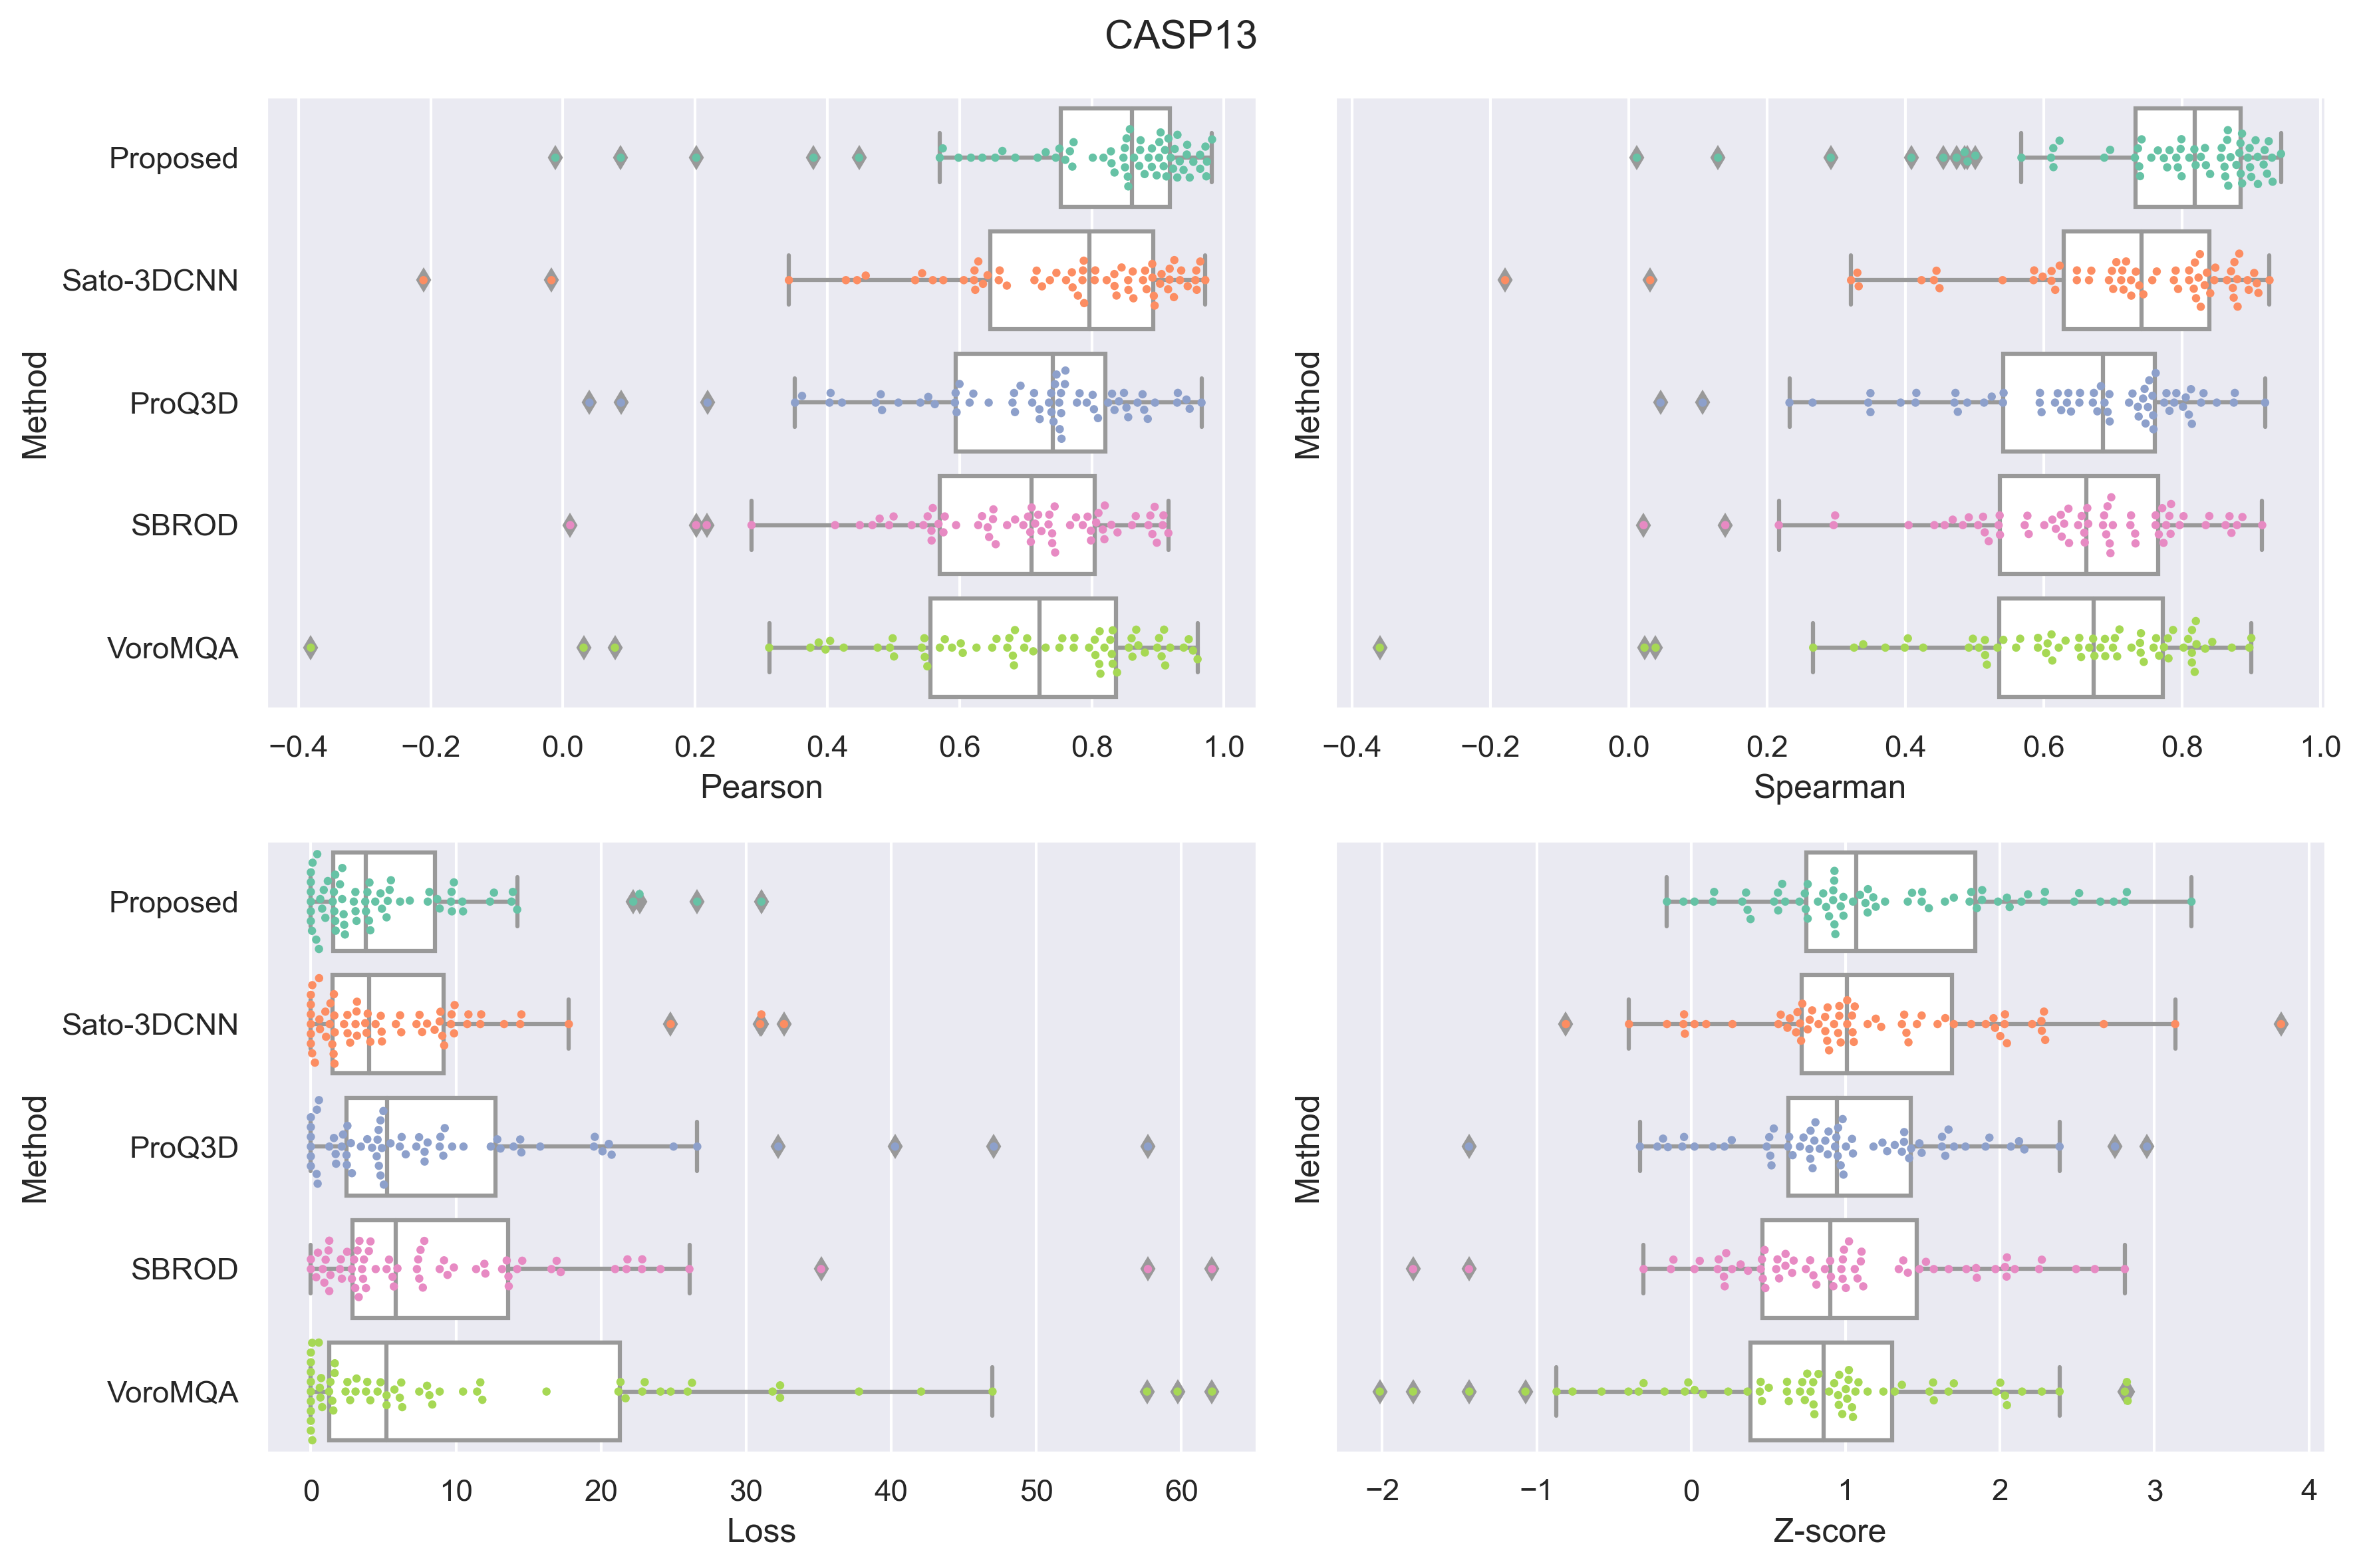

In [16]:
plot_all_metrics(casp13_per_target, title='CASP13')
plt.savefig('casp/plot/casp13_swarm_all_metrics.png')

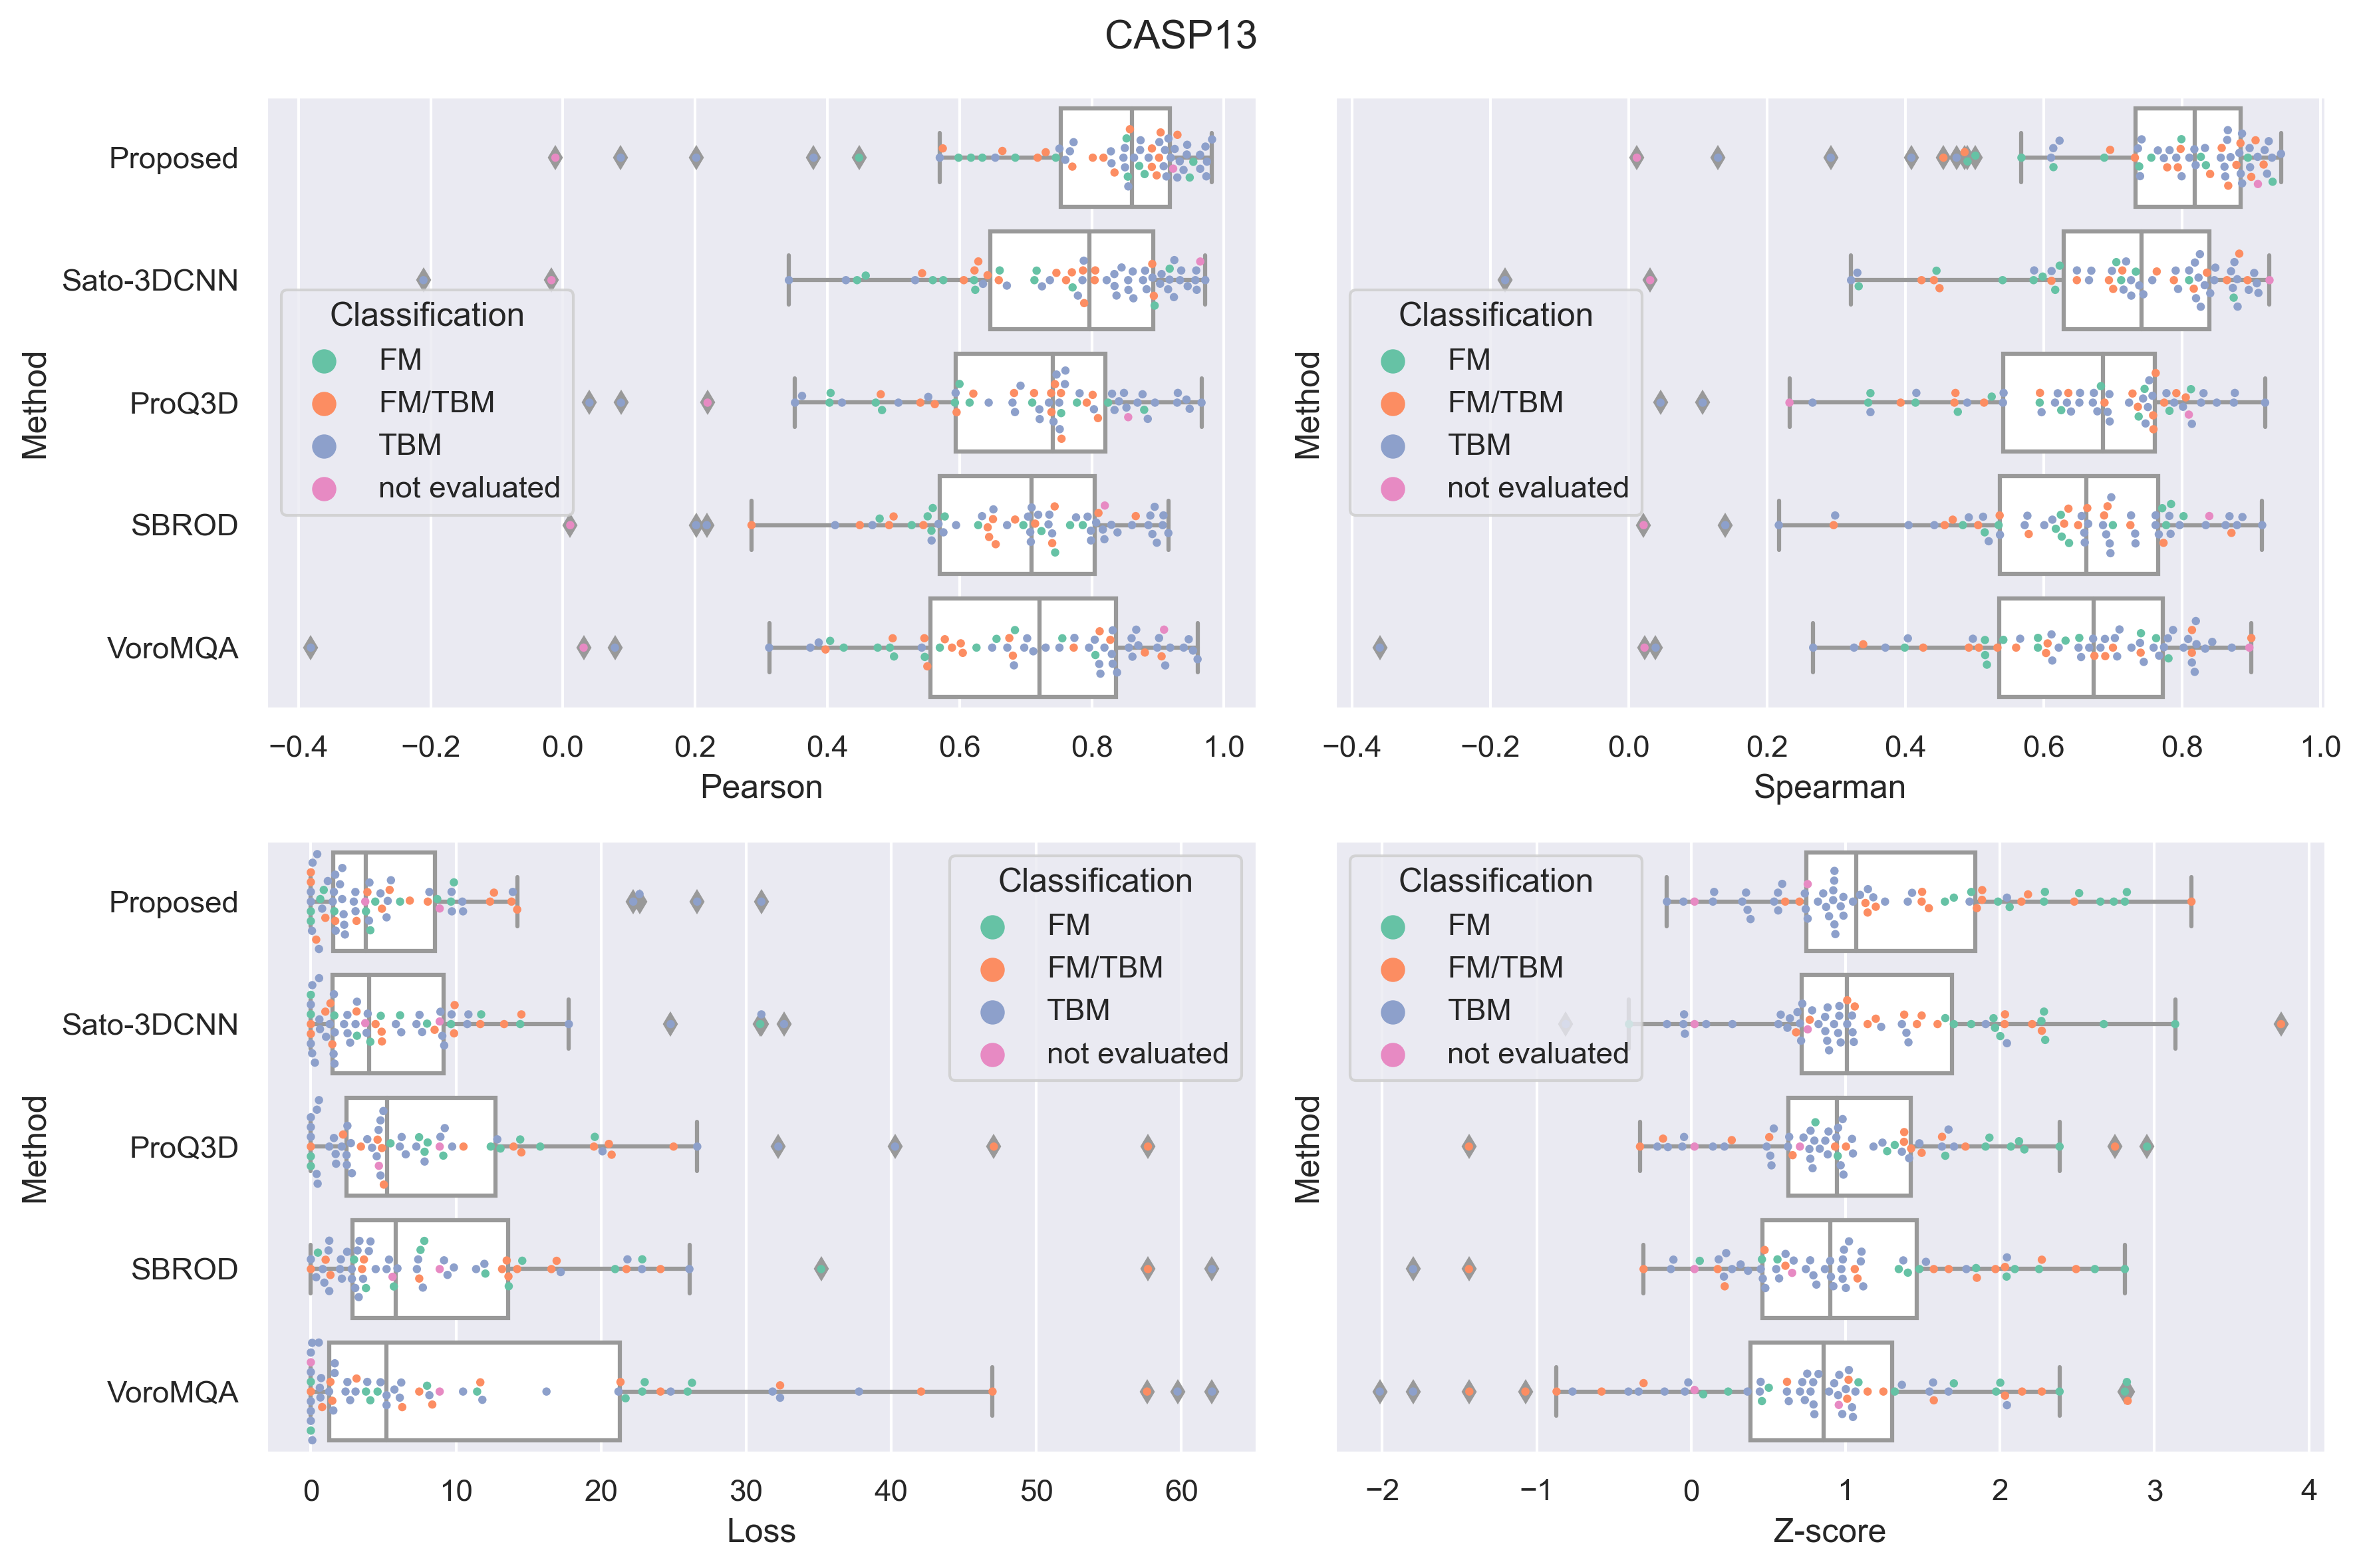

In [17]:
plot_all_metrics(casp13_per_target, title='CASP13', hue='Classification', hue_order=category_list)
plt.savefig('casp/plot/casp13_swarm_category_all_metrics.png')

In [18]:
# boxplot and swarmplot for each group
def plot_metrics_group(df, metrics, hue=None, hue_order=None, figsize=(8, 4), pointsize=3, orient='h'):
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, x=metrics, y='Method', orient=orient, color='white')
    g = sns.swarmplot(data=df, x=metrics, y='Method', orient=orient, hue=hue, hue_order=hue_order, size=pointsize, palette='Set2')
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), frameon=False, title='Category')
    plt.tight_layout()

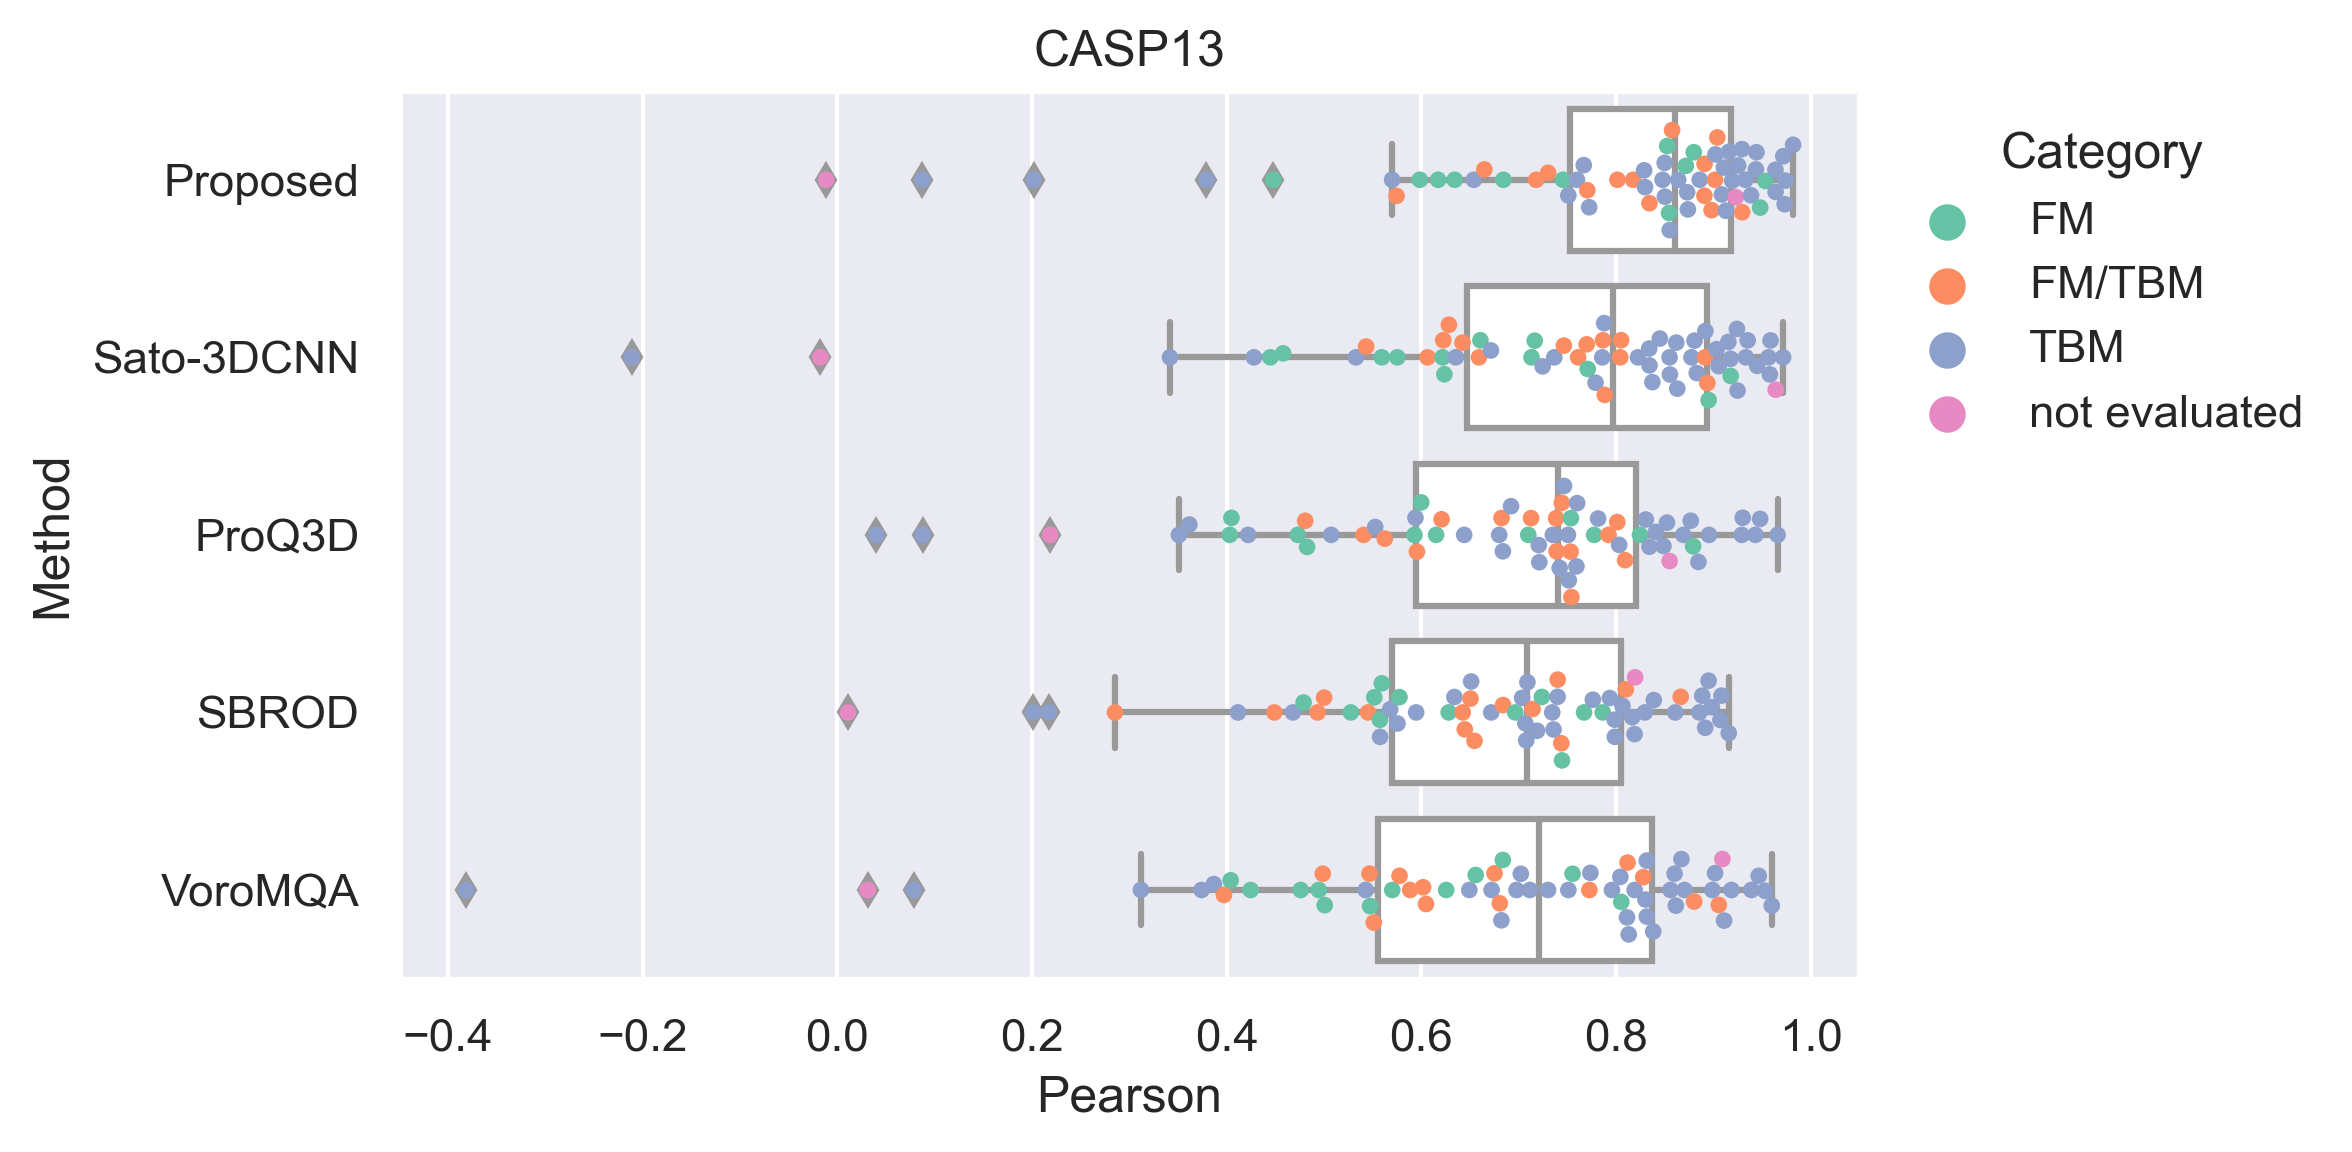

In [19]:
plot_metrics_group(casp13_per_target, 'Pearson', hue='Classification', hue_order=category_list, pointsize=4)
plt.title('CASP13')
plt.tight_layout()
plt.savefig('casp/plot/casp13_swarm_pearson.pdf')

In [20]:
casp13_per_target.sort_values('Pearson')[:20]

Method  Pearson  Spearman   Loss  Z-score   Target  Residues  \
139     VoroMQA   -0.381    -0.360 32.340   -0.768    T0979        98   
138  Sato-3DCNN   -0.211    -0.179 32.610   -0.811    T0979        98   
148  Sato-3DCNN   -0.017     0.031  8.880    0.022  T0980s2       163   
146    Proposed   -0.011     0.012  8.880    0.022  T0980s2       163   
147       SBROD    0.011     0.022  8.880    0.022  T0980s2       163   
149     VoroMQA    0.031     0.023  8.880    0.022  T0980s2       163   
135      ProQ3D    0.040     0.046 26.630    0.141    T0979        98   
104     VoroMQA    0.079     0.039 62.110   -1.801    T0973       146   
136    Proposed    0.087     0.129 26.630    0.141    T0979        98   
100      ProQ3D    0.088     0.107 32.220   -0.218    T0973       146   
257       SBROD    0.201     0.140  4.000    1.114    T1013       537   
256    Proposed    0.202     0.409  2.350    1.179    T1013       537   
137       SBROD    0.218     0.217 26.090    0.227    T0979        98   
145      ProQ3D    0.219     0.233  8.880    0.022  T0980s2       163   
297       SBROD    0.285     0.296 14.220    1.850  T1019s1       146   
194     VoroMQA    0.312     0.326  6.130    0.773  T0993s2       378   
103  Sato-3DCNN    0.342     0.322 31.050   -0.157    T0973       146   
190      ProQ3D    0.351     0.266  6.130    0.773  T0993s2       378   
255      ProQ3D    0.362     0.350 12.850    0.766    T1013       537   
259     VoroMQA    0.374     0.371 16.240    0.632    T1013       537   

           Type                      Domains  Residues in domain  \
139  All groups               T0979-D1: 6-97              92.000   
138  All groups               T0979-D1: 6-97              92.000   
148  All groups             T0980s2-D1: 6-36              31.000   
146  All groups             T0980s2-D1: 6-36              31.000   
147  All groups             T0980s2-D1: 6-36              31.000   
149  All groups             T0980s2-D1: 6-36              31.000   
135  All groups               T0979-D1: 6-97              92.000   
104  All groups  T0973-D1: 1-59,66-83,96-146             128.000   
136  All groups               T0979-D1: 6-97              92.000   
100  All groups  T0973-D1: 1-59,66-83,96-146             128.000   
257  All groups     T1013-D1: 39-236,422-511             288.000   
256  All groups     T1013-D1: 39-236,422-511             288.000   
137  All groups               T0979-D1: 6-97              92.000   
145  All groups             T0980s2-D1: 6-36              31.000   
297  All groups             T1019s1-D1: 1-58              58.000   
194  All groups           T0993s2-D1: 12-109              98.000   
103  All groups  T0973-D1: 1-59,66-83,96-146             128.000   
190  All groups           T0993s2-D1: 12-109              98.000   
255  All groups     T1013-D1: 39-236,422-511             288.000   
259  All groups     T1013-D1: 39-236,422-511             288.000   

    Classification   PDB  
139            TBM     -  
138            TBM     -  
148  not evaluated  6gnx  
146  not evaluated  6gnx  
147  not evaluated  6gnx  
149  not evaluated  6gnx  
135            TBM     -  
104            TBM  6yfn  
136            TBM     -  
100            TBM  6yfn  
257            TBM     -  
256            TBM     -  
137            TBM     -  
145  not evaluated  6gnx  
297         FM/TBM     -  
194            TBM  6xbd  
103            TBM  6yfn  
190            TBM  6xbd  
255            TBM     -  
259            TBM     -

In [21]:
def scatter_per_target(df, title=None, alpha=0.7, hue = 'Method', hue_order=None):
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=True, figsize=(12,12))
    y = 'Target'
    palette = 'Set2'
    sns.scatterplot(data=df, x='Pearson', y=y, hue=hue, hue_order=hue_order, ax=axes[0], alpha=alpha, palette=palette)
    sns.scatterplot(data=df, x='Spearman', y=y, hue=hue, hue_order=hue_order, ax=axes[1], alpha=alpha, palette=palette)
    sns.scatterplot(data=df, x='Loss', y=y, hue=hue, hue_order=hue_order, ax=axes[2], alpha=alpha, palette=palette)
    sns.scatterplot(data=df, x='Z-score', y=y, hue=hue, hue_order=hue_order, ax=axes[3], alpha=alpha, palette=palette)
    for i in range(3):
        ax = axes[i]
        ax.get_legend().remove()
    ax = axes[3]
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, 1), frameon=False)
    fig.suptitle(title)
    plt.tight_layout()

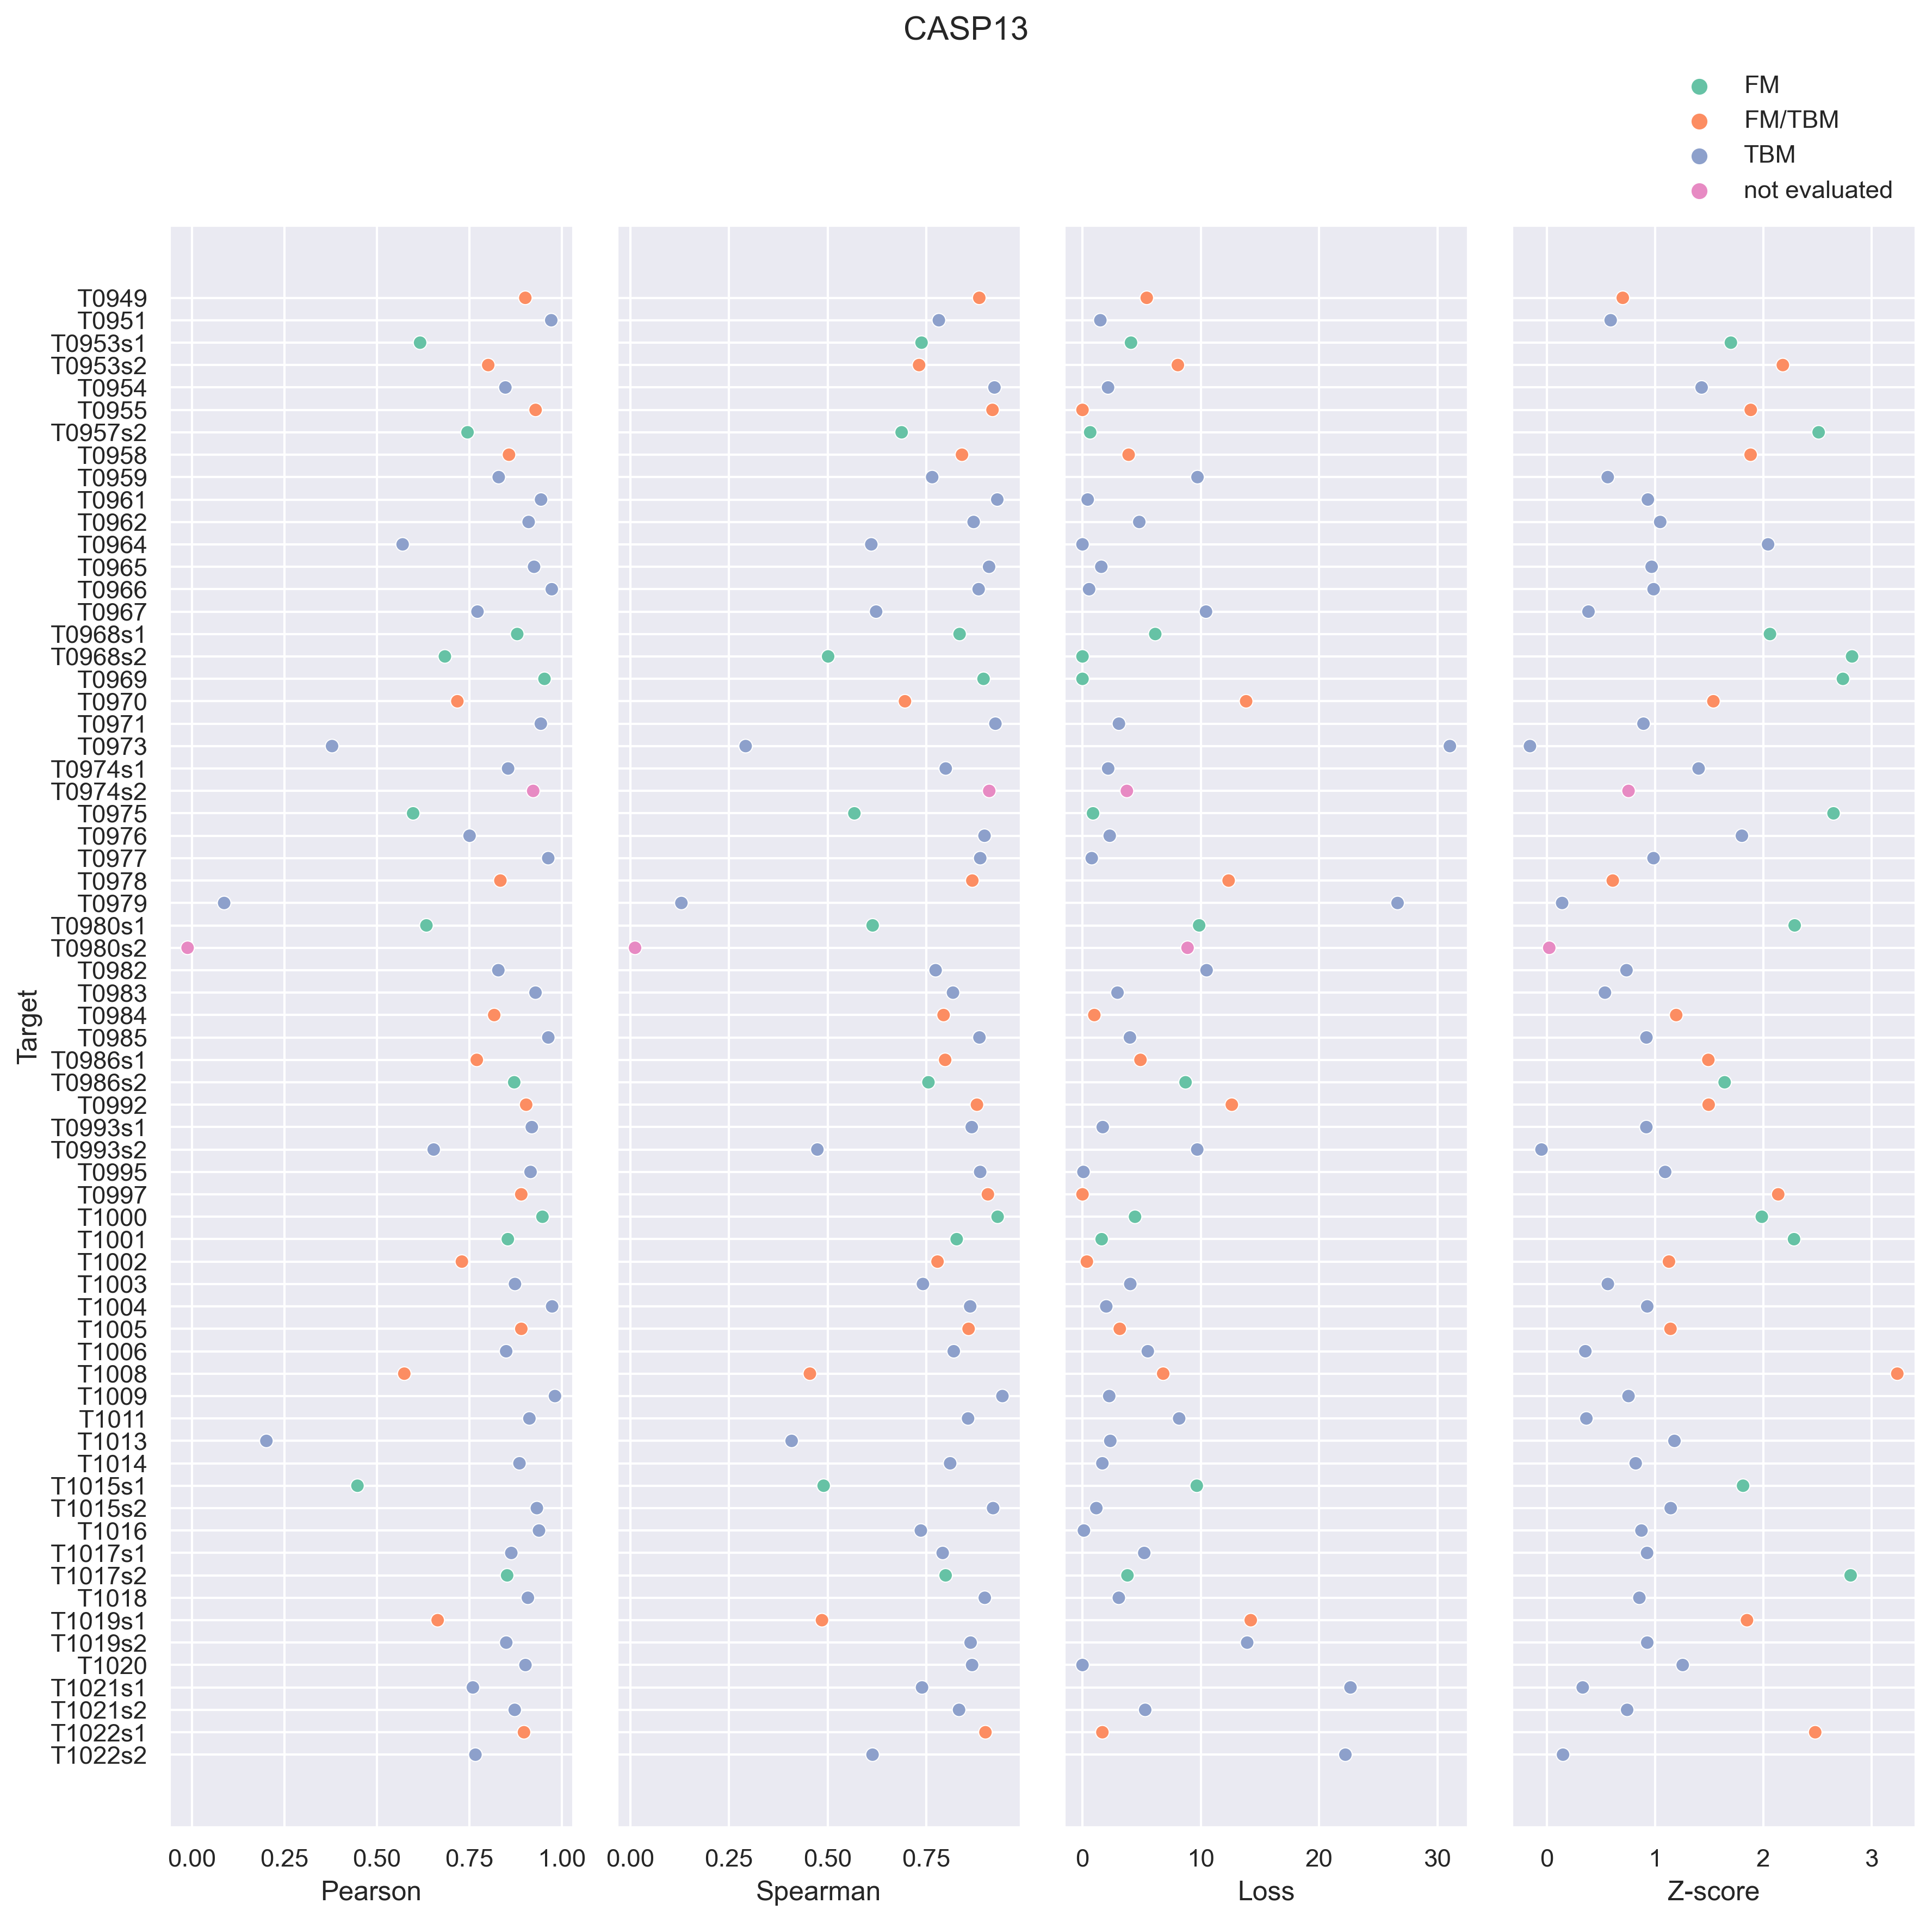

In [22]:
scatter_per_target(casp13_per_target.query('Method == "Proposed"'), alpha=1, title='CASP13', hue='Classification', hue_order=category_list)
plt.savefig('casp/plot/casp13_metrics_per_target.png')

In [23]:
casp12_per_target = eval_for_each_target(casp12_df, comparison_methods)
casp12_per_target = merge_category(casp12_per_target, casp12_category).sort_values('Target')
casp12_per_target

51


Method  Pearson  Spearman  Loss  Z-score Target  Residues  \
1      Proposed    0.950     0.965 0.180    1.006  T0860       137   
3    Sato-3DCNN    0.935     0.833 0.000    1.013  T0860       137   
0        ProQ3D    0.848     0.815 0.000    1.013  T0860       137   
2         SBROD    0.863     0.878 2.940    0.900  T0860       137   
4       VoroMQA    0.861     0.766 0.000    1.013  T0860       137   
..          ...      ...       ...   ...      ...    ...       ...   
250      ProQ3D    0.947     0.874 5.200    1.257  T0948       166   
252       SBROD    0.809     0.826 3.020    1.348  T0948       166   
251    Proposed    0.977     0.888 7.050    1.179  T0948       166   
253  Sato-3DCNN    0.902     0.829 3.190    1.341  T0948       166   
254     VoroMQA    0.865     0.852 5.200    1.257  T0948       166   

            Type                  Domains  Residues in domain Classification  \
1    Server only          T0860-D1: 1-136             136.000            TBM   
3    Server only          T0860-D1: 1-136             136.000            TBM   
0    Server only          T0860-D1: 1-136             136.000            TBM   
2    Server only          T0860-D1: 1-136             136.000            TBM   
4    Server only          T0860-D1: 1-136             136.000            TBM   
..           ...                      ...                 ...            ...   
250   All groups  T0948-D1: 1-125,138-161             149.000            TBM   
252   All groups  T0948-D1: 1-125,138-161             149.000            TBM   
251   All groups  T0948-D1: 1-125,138-161             149.000            TBM   
253   All groups  T0948-D1: 1-125,138-161             149.000            TBM   
254   All groups  T0948-D1: 1-125,138-161             149.000            TBM   

      PDB  
1    5fjl  
3    5fjl  
0    5fjl  
2    5fjl  
4    5fjl  
..    ...  
250  5tj4  
252  5tj4  
251  5tj4  
253  5tj4  
254  5tj4  

[255 rows x 12 columns]

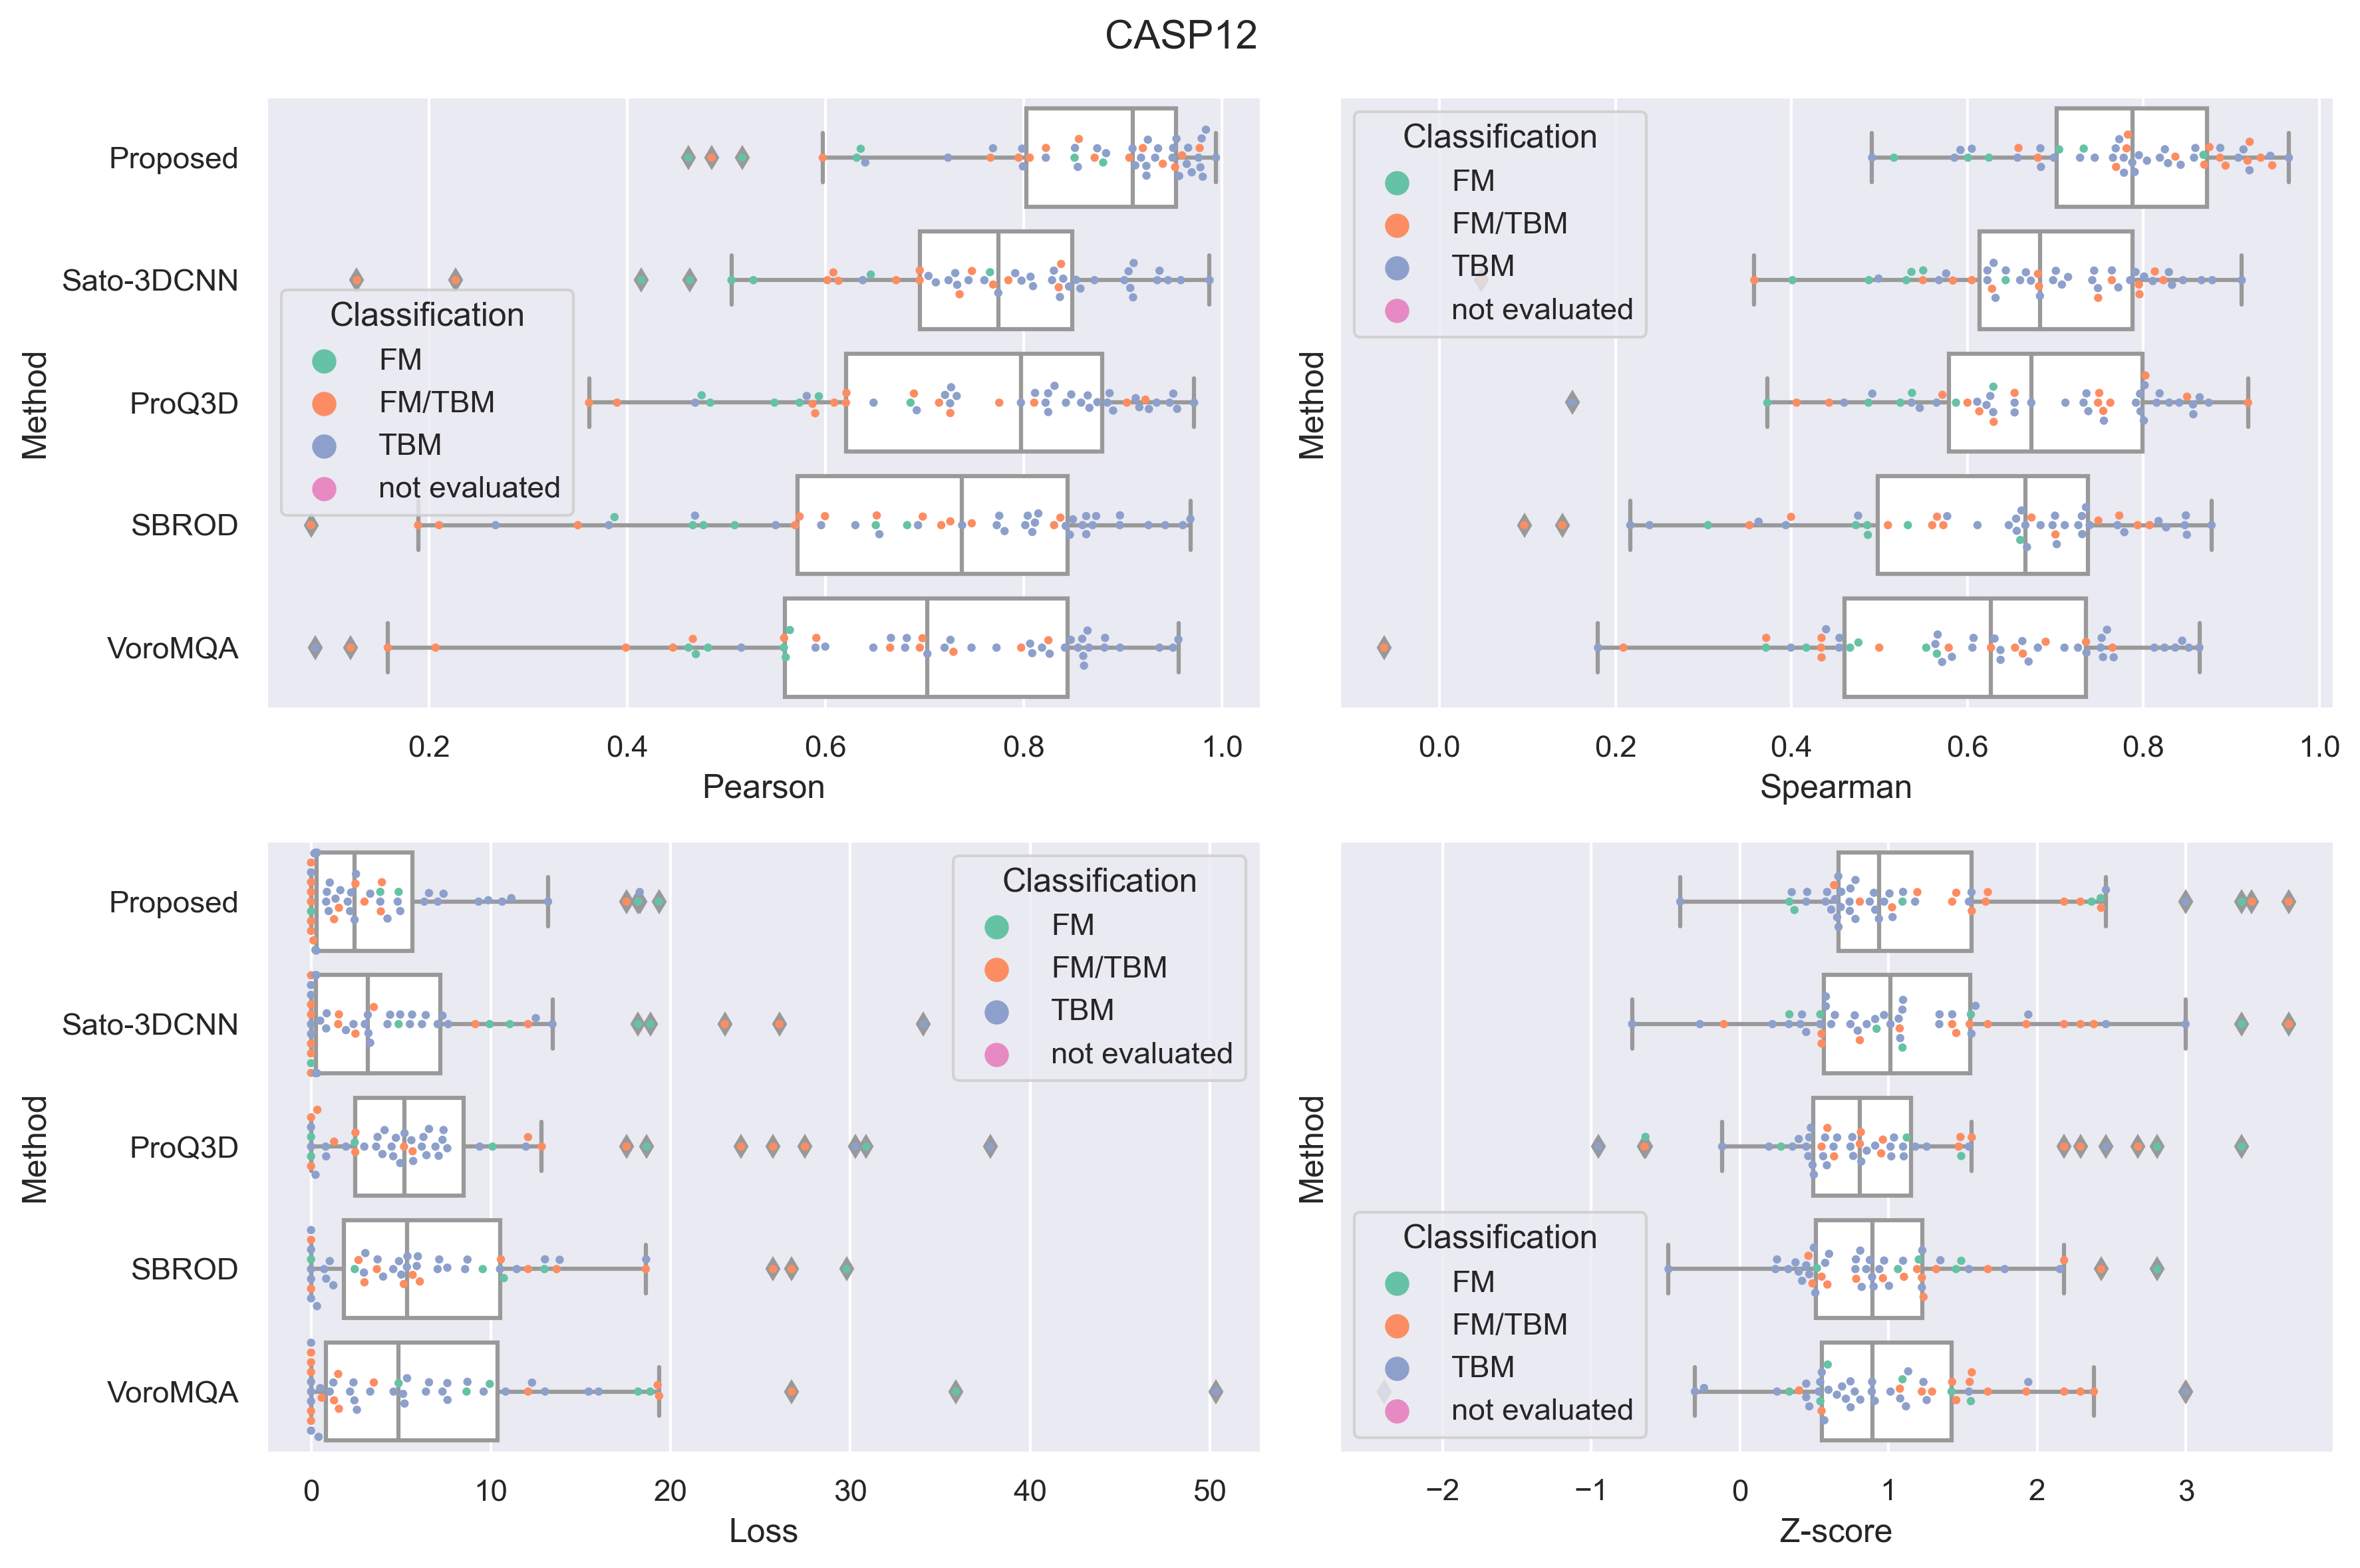

In [24]:
plot_all_metrics(casp12_per_target, title='CASP12', hue='Classification', hue_order=category_list)
plt.savefig('casp/plot/casp12_swarm_category_all_metrics.png')

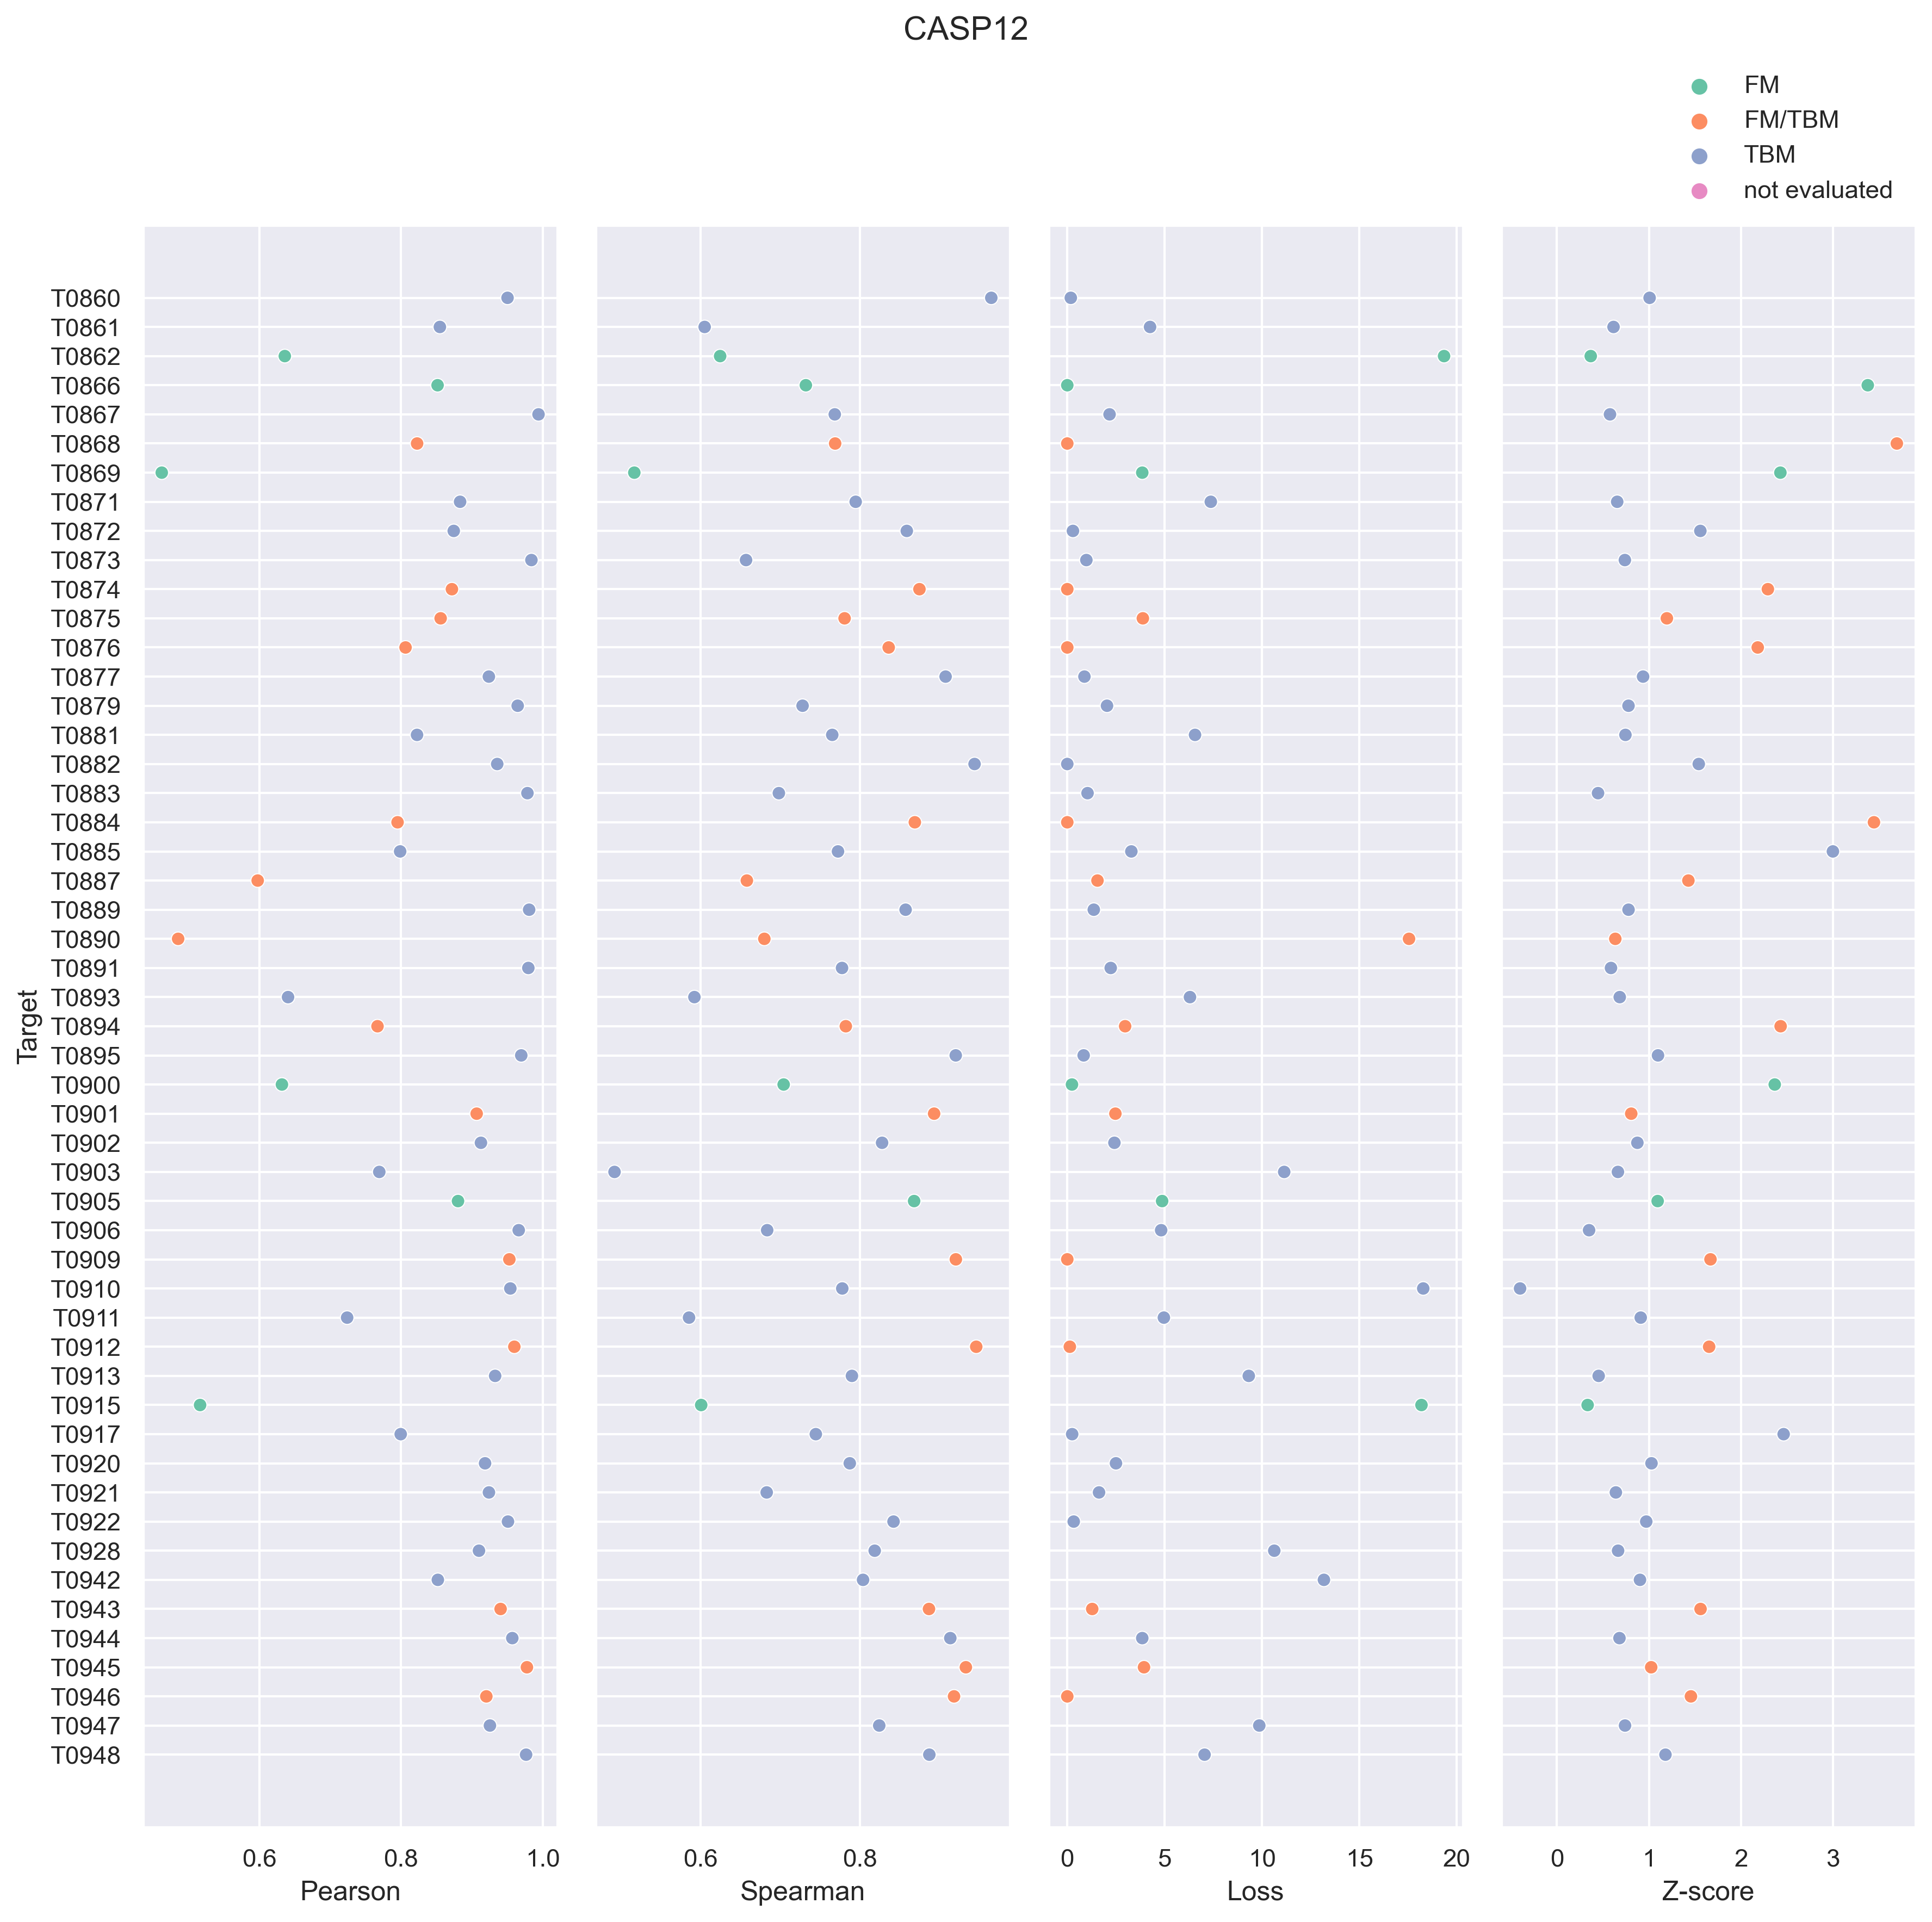

In [25]:
scatter_per_target(casp12_per_target.query('Method == "Proposed"'), alpha=1, title='CASP12', hue='Classification', hue_order=category_list)
plt.savefig('casp/plot/casp12_metrics_per_target.png')

In [26]:
def scatter(df, x='GDT_TS', y='Proposed', col_wrap=4):
    g = sns.relplot(data=df, kind='scatter', x=x, y=y, col='target', col_wrap=col_wrap)
    g.set(xlim=(0, 100), ylim=(0, 1))
    plt.subplots_adjust(wspace=0.1)

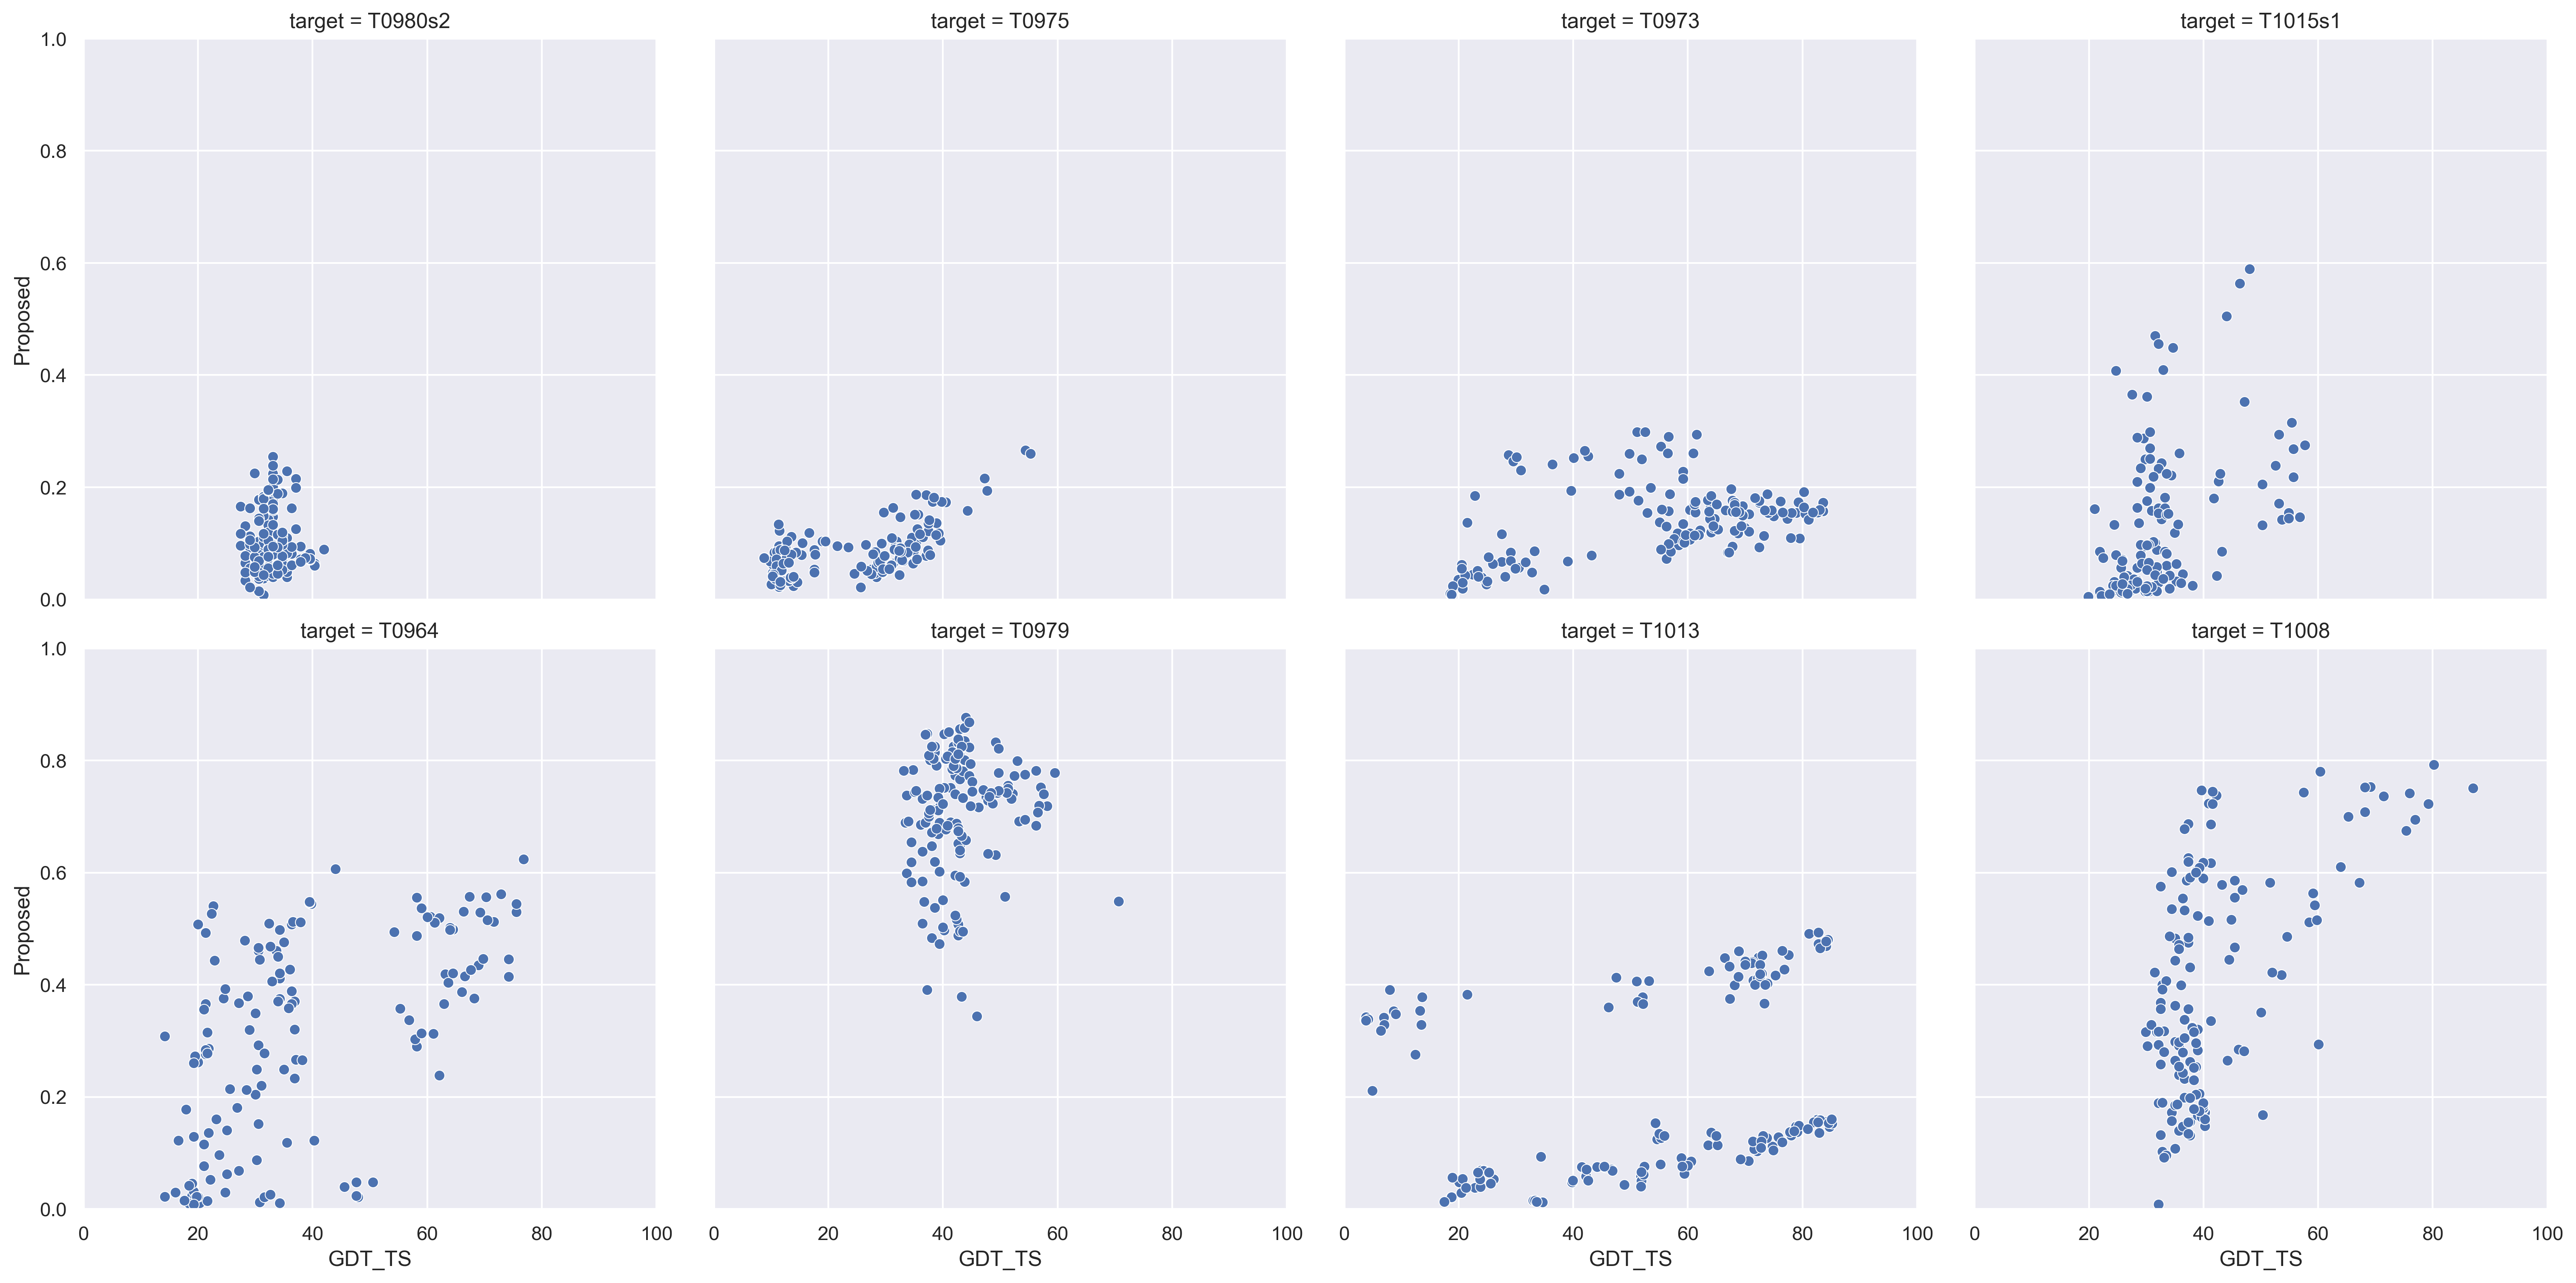

In [27]:
low_pearson_list = casp13_per_target.query('Method == "Proposed"').sort_values('Pearson')[: 8]['Target']
casp13_low_df = casp13_df.query('target in @low_pearson_list')
scatter(casp13_low_df)